<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%202.3%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

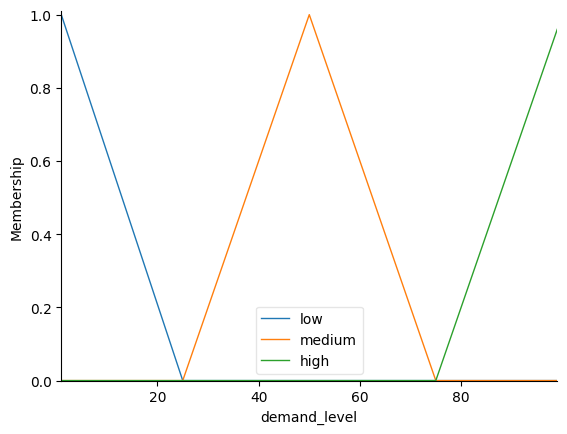

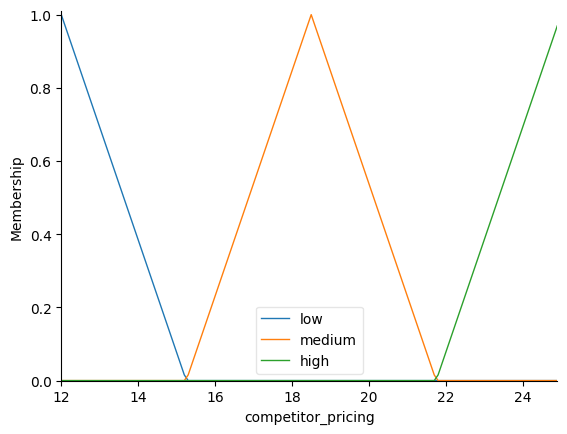

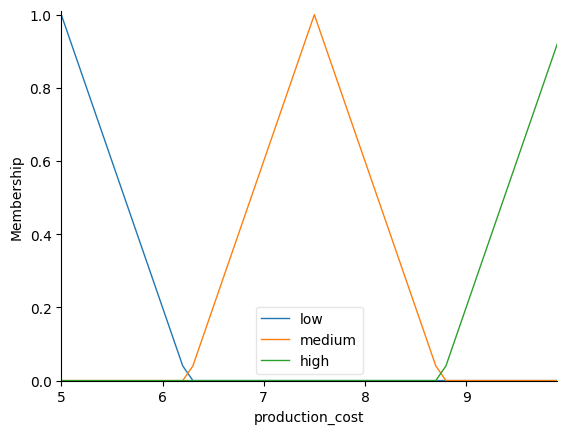

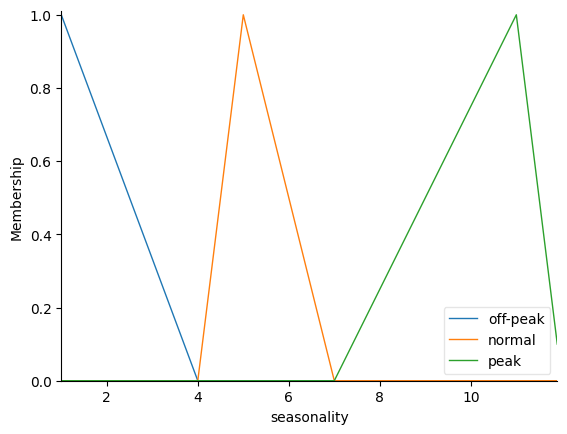

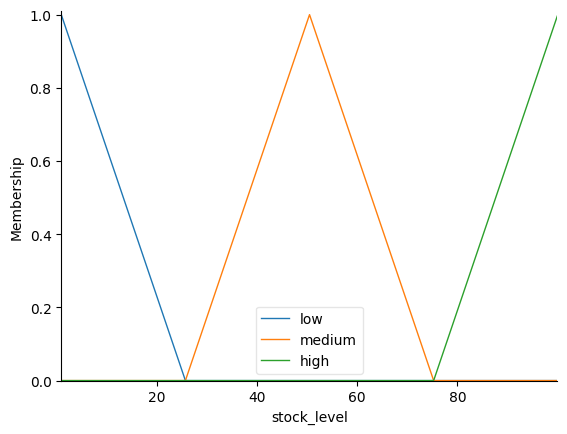

In [ ]:
# exam 2

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


demand_level=ctrl.Antecedent(np.arange(1,100,1),'demand_level')
competitor_pricing=ctrl.Antecedent(np.arange(12,25,0.1),'competitor_pricing')
production_cost=ctrl.Antecedent(np.arange(5,10,0.1),'production_cost')
seasonality=ctrl.Antecedent(np.arange(1,12,0.1),'seasonality')
stock_level=ctrl.Antecedent(np.arange(1,100,0.1),'stock_level')
final_price=ctrl.Consequent(np.arange(10,25,0.1),'final_price')


demand_level['low']=fuzz.trimf(demand_level.universe,[1,1,25])
demand_level['medium']=fuzz.trimf(demand_level.universe,[25,50,75])
demand_level['high']=fuzz.trimf(demand_level.universe,[75,100,100])
competitor_pricing['low']=fuzz.trimf(competitor_pricing.universe,[12,12,15.25])
competitor_pricing['medium']=fuzz.trimf(competitor_pricing.universe,[15.25,18.5,21.75])
competitor_pricing['high']=fuzz.trimf(competitor_pricing.universe,[21.75,25,25])
production_cost['low']=fuzz.trimf(production_cost.universe,[5,5,6.25])
production_cost['medium']=fuzz.trimf(production_cost.universe,[6.25,7.5,8.75])
production_cost['high']=fuzz.trimf(production_cost.universe,[8.75,10,10])
seasonality['off-peak']=fuzz.trimf(seasonality.universe,[1,1,4])
seasonality['normal']=fuzz.trimf(seasonality.universe,[4,5,7])
seasonality['peak']=fuzz.trimf(seasonality.universe,[7,11,12])
stock_level['low']=fuzz.trimf(stock_level.universe,[1,1,25.75])
stock_level['medium']=fuzz.trimf(stock_level.universe,[25.75,50.5,75.25])
stock_level['high']=fuzz.trimf(stock_level.universe,[75.25,100,100])
final_price['very low']=fuzz.trimf(final_price.universe,[10,10,11.875])
final_price['low']=fuzz.trimf(final_price.universe,[11.875,13.75,15.625])
final_price['medium']=fuzz.trimf(final_price.universe,[15.625,17.5,19.375])
final_price['high']=fuzz.trimf(final_price.universe,[19.375,21.25,23.125])
final_price['very high']=fuzz.trimf(final_price.universe,[23.125,25,25])



demand_level.view()
competitor_pricing.view()
production_cost.view()
seasonality.view()
stock_level.view()
final_price.view()

17.5


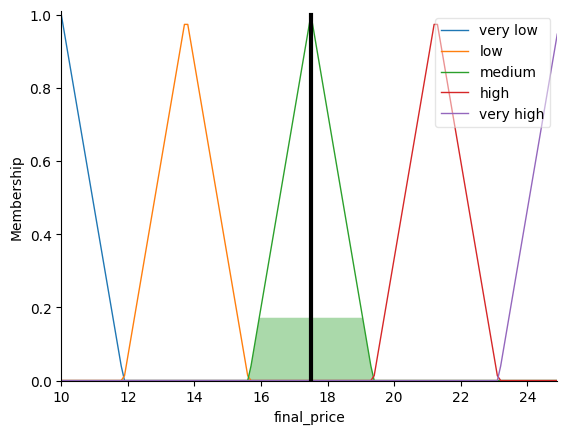

In [7]:
from typing_extensions import final


rule1=ctrl.Rule(demand_level['high']&competitor_pricing['high']&stock_level['low'],final_price['very high'])
rule2=ctrl.Rule(demand_level['high']&seasonality['peak']&stock_level['low'],final_price['very high'])
rule3=ctrl.Rule(demand_level['high']&production_cost['high']&stock_level['low'],final_price['very high'])
rule4=ctrl.Rule(demand_level['high']&competitor_pricing['medium']&stock_level['medium'],final_price['high'])
rule5=ctrl.Rule(demand_level['medium']&competitor_pricing['high']&stock_level['low'],final_price['high'])
rule6=ctrl.Rule(demand_level['high']&seasonality['peak']&stock_level['medium'],final_price['high'])
rule7=ctrl.Rule(demand_level['medium']&competitor_pricing['medium']&stock_level['medium'],final_price['medium'])
rule8=ctrl.Rule(demand_level['low']&competitor_pricing['high']&stock_level['medium'],final_price['medium'])
rule9=ctrl.Rule(demand_level['medium']&production_cost['medium']&stock_level['medium'],final_price['medium'])
rule10=ctrl.Rule(demand_level['low']&competitor_pricing['low']&stock_level['high'],final_price['low'])
rule11=ctrl.Rule(demand_level['medium']&production_cost['low']&stock_level['high'],final_price['low'])
rule12=ctrl.Rule(demand_level['low']&seasonality['off-peak']&stock_level['high'],final_price['low'])
rule13=ctrl.Rule(demand_level['low']&competitor_pricing['low']&stock_level['high'],final_price['very low'])
rule14=ctrl.Rule(demand_level['low']&seasonality['off-peak']&stock_level['high'],final_price['very low'])
rule15=ctrl.Rule(demand_level['medium']&competitor_pricing['low']&stock_level['low'],final_price['very low'])





pricing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
princing=ctrl.ControlSystemSimulation(pricing_ctrl)
princing.input['demand_level']=57
princing.input['competitor_pricing']=21
princing.input['production_cost']=7
princing.input['seasonality']=2
princing.input['stock_level']=30

princing.compute()
print(princing.output['final_price'])
final_price.view(sim=princing)
